In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("rain.csv")

In [3]:
df = df.dropna(axis=0)
df = df.iloc[:, 1:5]
df.head()

,PRCP,TMAX,TMIN,RAIN
0,0.47,51,42,True
1,0.59,45,36,True
2,0.42,45,35,True
3,0.31,45,34,True
4,0.17,45,32,True


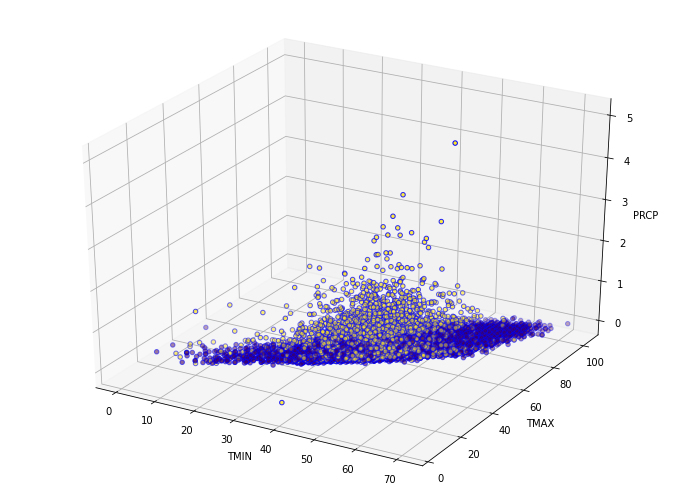

In [4]:
fig = plt.figure(figsize = (12, 9))
ax = plt.axes(projection ="3d")

ax.set_xlabel("TMIN")
ax.set_ylabel("TMAX")
ax.set_zlabel("PRCP")
ax.scatter3D(xs=df["TMIN"],ys=df["TMAX"],zs=df["PRCP"], c=df["RAIN"], edgecolor="b", facecolor="g")
plt.show()

In [6]:
df2 = pd.read_csv("Seattle Precipitation 01012017-04232022.csv")

In [7]:
df2.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,112.5,1/1/2017,0.43,3.0,2.0,35.0,37,28
1,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,112.5,1/2/2017,0.00,0.0,2.0,32.0,34,26
2,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,112.5,1/3/2017,0.00,0.0,2.0,27.0,33,21
3,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,112.5,1/4/2017,0.00,0.0,1.2,27.0,36,22
4,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,112.5,1/5/2017,0.00,0.0,0.0,28.0,35,21


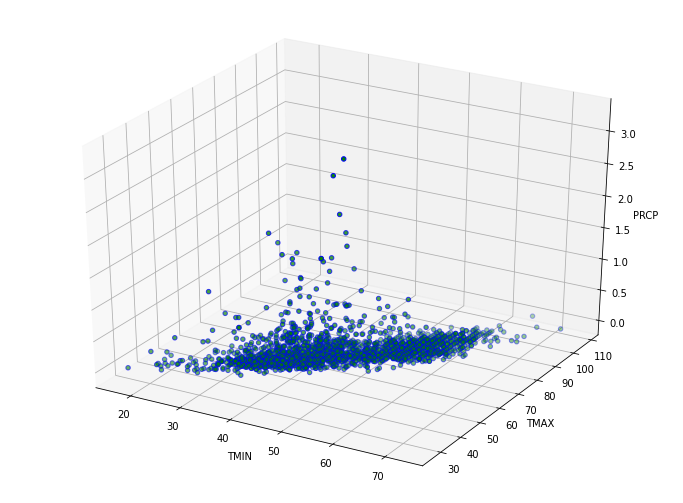

In [8]:
fig = plt.figure(figsize = (12, 9))
ax = plt.axes(projection ="3d")

ax.set_xlabel("TMIN")
ax.set_ylabel("TMAX")
ax.set_zlabel("PRCP")
ax.scatter3D(xs=df2["TMIN"],ys=df2["TMAX"],zs=df2["PRCP"], edgecolor="b", facecolor="g")
plt.show()

In [9]:
train, test = train_test_split(df, train_size=0.8, test_size=0.2)

In [10]:
train_lable = train["RAIN"].astype('int')
test_lable = test["RAIN"].astype('int')
train = train.drop(columns='RAIN')
test = test.drop(columns='RAIN')

In [11]:
df.corr().style.background_gradient(axis=0)

,PRCP,TMAX,TMIN
PRCP,1.000000,-0.226736,-0.064365
TMAX,-0.226736,1.000000,0.860675
TMIN,-0.064365,0.860675,1.000000


In [12]:
columns = ['PRCP', 'TMAX', 'TMIN']

for column in columns:
  NB_classifier = GaussianNB().fit(train[[column]], train_lable)
  print(column, NB_classifier.score(test[[column]], test_lable))


PRCP 1.0
TMAX 0.6788649706457925
TMIN 0.6162426614481409


In [15]:
Knn_classifiers = []

# k = 1, 3, 5, 7, 9
for k in range(1, 10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k).fit(train, train_lable)
    Knn_classifiers.append(classifier)

In [17]:
# Evaluating 5 classifiers with different k values
k = 1
for classifier in Knn_classifiers:
    print("K =", k, ", score =", classifier.score(test, test_lable))
    k += 2

K = 1 , score = 0.9780821917808219
K = 3 , score = 0.9563600782778865
K = 5 , score = 0.9338551859099804
K = 7 , score = 0.9185909980430529
K = 9 , score = 0.9056751467710372


In [13]:
print("KNN",KNeighborsClassifier(n_neighbors=1).fit(train, train_lable).score(test, test_lable))

KNN 0.9780821917808219


In [14]:
print("Decision Tree",DecisionTreeClassifier().fit(train, train_lable).score(test, test_lable))

Decision Tree 1.0
